<a href="https://colab.research.google.com/github/yamaguchinorimitsu/ajax_app/blob/master/%E3%82%B9%E3%83%83%E3%82%AD%E3%83%AA%E6%A9%9F%E6%A2%B0%E7%AC%AC%EF%BC%96%E7%AB%A0%E7%B7%B4%E7%BF%92%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

df = pd.read_csv('/content/ex3.csv')
df.head() # 先頭3行の中身を表示

,x0,x1,x2,x3,target
0,1.000943,2.114344,-1.148213,-0.051415,77.147293
1,1.505901,-0.626081,3.041686,-0.587336,278.595852
2,-0.390320,0.283607,-0.940359,-2.154124,-71.039904
3,-0.167273,1.413624,-0.632571,-1.016131,42.193870
4,-0.728801,1.370530,0.168298,-1.203904,89.167955


In [5]:
df.isnull().any(axis = 0)

x0         True
x1        False
x2         True
x3        False
target    False
dtype: bool

In [6]:
df2 = df.fillna(df.median())

In [7]:
df2.isnull().any(axis = 0)

x0        False
x1        False
x2        False
x3        False
target    False
dtype: bool

<Axes: xlabel='x0', ylabel='target'>

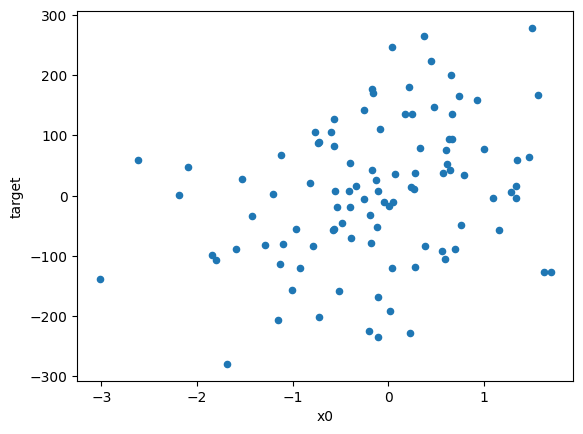

In [8]:
%matplotlib inline

# SNS2とsalesの散布図の作成
df2.plot(kind = 'scatter', x = 'x0', y = 'target')

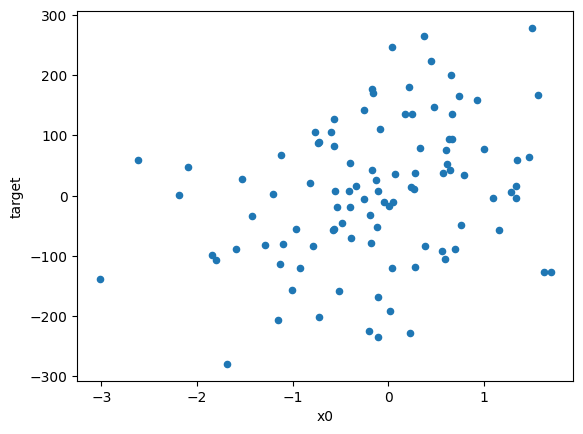

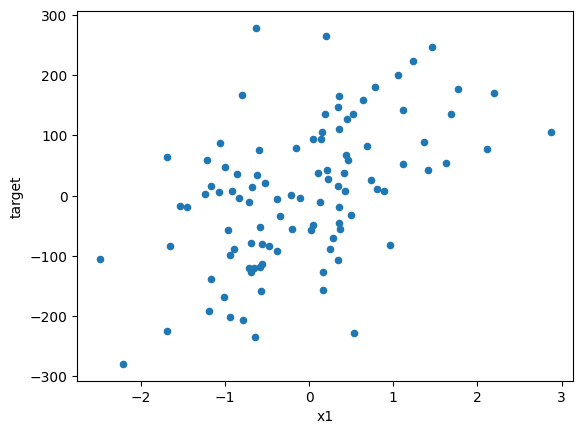

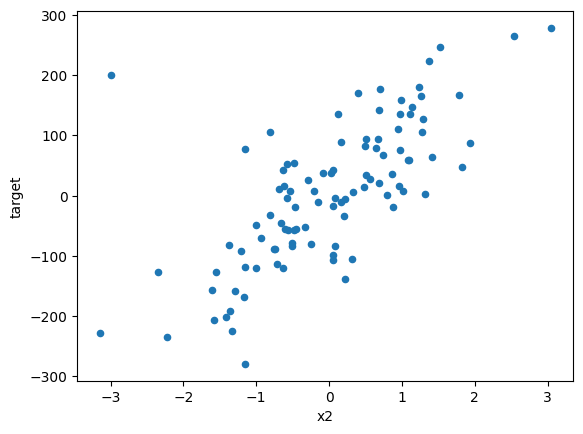

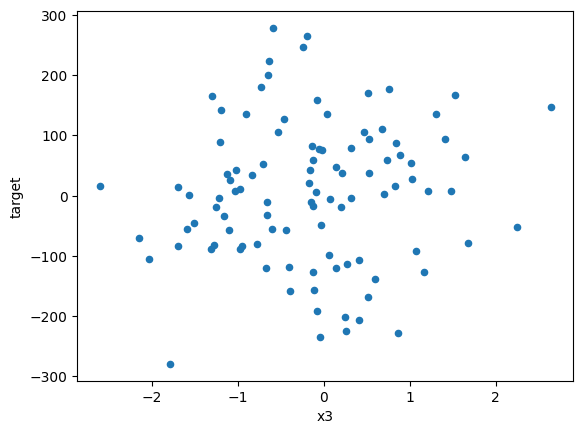

In [17]:
for name in df.columns:
    if name ==  'target':
        continue
    df2.plot(kind = 'scatter', x = name, y = 'target')

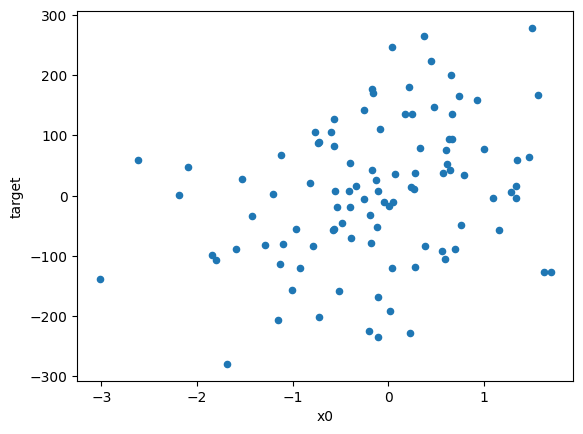

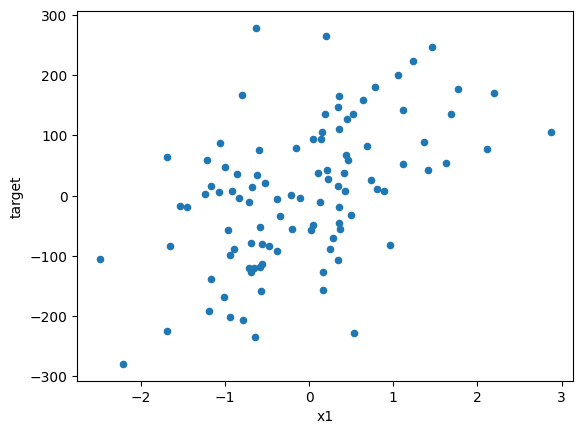

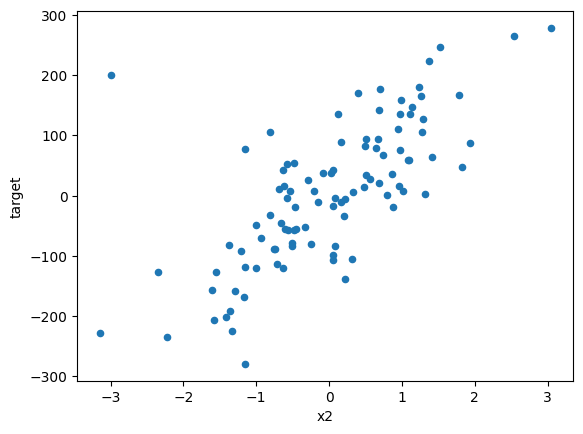

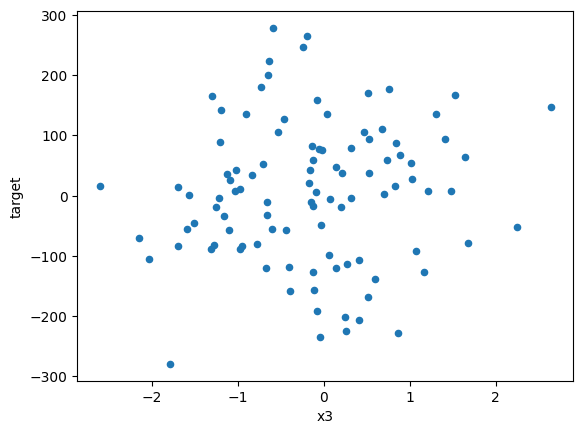

In [19]:
for name in df.columns:
    if name == 'target':
        continue
    df2.plot(kind = 'scatter', x = name, y = 'target')

In [20]:
no = df2[(df2['x2'] < -2) & (df2['target'] > 100)].index
df3 = df2.drop(no, axis = 0)

In [22]:
x = df3.loc[ : , :'x3'] # 特徴量の取り出し
t = df3['target']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.2, random_state = 1)

In [25]:
from sklearn.linear_model import LinearRegression

#LinearRegression関数を使ってモデルを作成する
#random_state=0 等の記述は必要なし
model = LinearRegression()

# fitモデルで学習
model.fit(x_train, y_train)

LinearRegression()

In [27]:
model.score(x_test,y_test)

0.982034507442197